In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


In [9]:
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [33]:
torch.device= "cuda" if torch.cuda.is_available() else "cpu"
print(torch.device)

cuda


In [4]:
"""Defines model architecture and forward method"""

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model_architecture = nn.Sequential(
            nn.LazyConv2d(6, 5),    
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.LazyConv2d(16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),

            nn.LazyLinear(120),
            nn.ReLU(),

            nn.LazyLinear(84),
            nn.ReLU(),

            nn.LazyLinear(10)
        )

    def forward(self, x):
        x = self.model_architecture(x)
        return x




In [5]:
"""Loads model and initializes weights"""

model=LeNet()

X=torch.randn(1,1,28,28)

output=model(X)


In [15]:
"""Loads data and creates dataloaders"""

training_data=MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data=MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader=DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


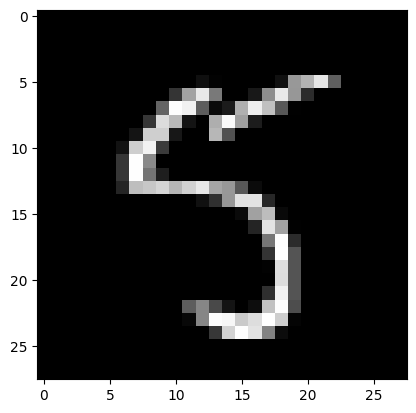

Label: 5


In [26]:
"""Visualizing data"""

import matplotlib.pyplot as plt

train_features, train_labels=next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
optimizer=torch.optim.AdamW(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()
epochs=200

In [ ]:
start_epoch = 1
target_epoch = 170

for epoch in range(start_epoch, target_epoch):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    if epoch == 140:
        break


    for images , labels in train_dataloader:


        pred=model(images)

        loss=criterion(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(pred, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Loss: {epoch_loss:.4f}, "
          f"Accuracy: {epoch_accuracy:.2f}%")
        

    

Epoch [151/1000] Loss: 0.0424, Accuracy: 98.91%
Epoch [152/1000] Loss: 0.0469, Accuracy: 98.80%
Epoch [153/1000] Loss: 0.0497, Accuracy: 98.77%
Epoch [154/1000] Loss: 0.0370, Accuracy: 99.06%
Epoch [155/1000] Loss: 0.0481, Accuracy: 98.85%
Epoch [156/1000] Loss: 0.0433, Accuracy: 98.93%
Epoch [157/1000] Loss: 0.0425, Accuracy: 98.90%
Epoch [158/1000] Loss: 0.0418, Accuracy: 98.92%
Epoch [159/1000] Loss: 0.0437, Accuracy: 98.90%
Epoch [160/1000] Loss: 0.0394, Accuracy: 98.98%
Epoch [161/1000] Loss: 0.0440, Accuracy: 98.89%
Epoch [162/1000] Loss: 0.0380, Accuracy: 99.06%
Epoch [163/1000] Loss: 0.0473, Accuracy: 98.83%
Epoch [164/1000] Loss: 0.0435, Accuracy: 98.91%
Epoch [165/1000] Loss: 0.0425, Accuracy: 98.94%
Epoch [166/1000] Loss: 0.0471, Accuracy: 98.86%
Epoch [167/1000] Loss: 0.0392, Accuracy: 99.04%
Epoch [168/1000] Loss: 0.0418, Accuracy: 98.97%
Epoch [169/1000] Loss: 0.0473, Accuracy: 98.81%
Epoch [170/1000] Loss: 0.0436, Accuracy: 98.94%


In [37]:
model.eval()

correct = 0
total = 0

with torch.no_grad():

    for images, labels in test_dataloader:

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = 100 * correct / total

print(f"Test Accuracy: {test_accuracy:.2f}%")



Test Accuracy: 98.47%


In [38]:
torch.save(model.state_dict(), "lenet_mnist.pth")
